<a href="https://colab.research.google.com/github/ludoveltz/BOOK_IA/blob/main/Convertisseur_fichiers_CAO_vers_Graphe_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  At

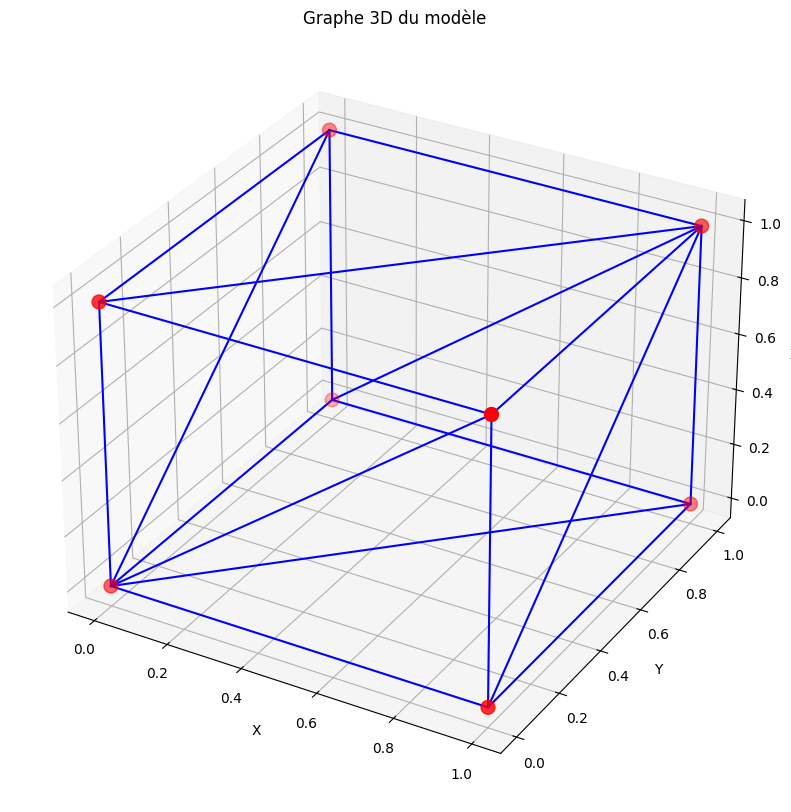

In [1]:
# Installation des bibliothèques nécessaires
!pip install trimesh networkx matplotlib open3d numpy

import trimesh
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d

# Fonction pour créer un exemple de mesh simple (cube)
def create_sample_mesh():
    vertices = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
    ])
    faces = np.array([
        [0, 1, 2], [0, 2, 3],  # face avant
        [4, 5, 6], [4, 6, 7],  # face arrière
        [0, 4, 7], [0, 7, 3],  # face gauche
        [1, 5, 6], [1, 6, 2],  # face droite
        [0, 1, 5], [0, 5, 4],  # face bas
        [3, 2, 6], [3, 6, 7]   # face haut
    ])
    return trimesh.Trimesh(vertices=vertices, faces=faces)

# Fonction pour convertir un mesh en graphe
def mesh_to_graph(mesh):
    # Créer un graphe non dirigé
    G = nx.Graph()

    # Ajouter les sommets
    for i, vertex in enumerate(mesh.vertices):
        G.add_node(i, pos=vertex)

    # Ajouter les arêtes
    for edge in mesh.edges:
        G.add_edge(edge[0], edge[1])

    return G

# Fonction pour visualiser le graphe en 3D
def visualize_graph_3d(G):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Dessiner les nœuds
    pos = nx.get_node_attributes(G, 'pos')
    xs = [pos[node][0] for node in G.nodes()]
    ys = [pos[node][1] for node in G.nodes()]
    zs = [pos[node][2] for node in G.nodes()]
    ax.scatter(xs, ys, zs, c='r', s=100)

    # Dessiner les arêtes
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, 'b-')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Graphe 3D du modèle')
    plt.show()

# Fonction pour visualiser le mesh original avec Open3D
def visualize_original_mesh(mesh):
    # Convertir le mesh Trimesh en mesh Open3D
    vertices = o3d.utility.Vector3dVector(mesh.vertices)
    faces = o3d.utility.Vector3iVector(mesh.faces)
    mesh_o3d = o3d.geometry.TriangleMesh(vertices, faces)

    # Ajouter des couleurs pour une meilleure visualisation
    mesh_o3d.paint_uniform_color([0.8, 0.8, 0.8])
    mesh_o3d.compute_vertex_normals()

    # Visualiser
    o3d.visualization.draw_geometries([mesh_o3d])

# Programme principal
def main():
    # Créer un mesh d'exemple
    print("Création du mesh d'exemple...")
    mesh = create_sample_mesh()

    # Convertir en graphe
    print("Conversion du mesh en graphe...")
    G = mesh_to_graph(mesh)

    # Afficher les statistiques
    print("\nStatistiques du graphe:")
    print(f"Nombre de nœuds: {G.number_of_nodes()}")
    print(f"Nombre d'arêtes: {G.number_of_edges()}")

    # Visualiser le mesh original
    print("\nVisualisation du mesh original...")
    visualize_original_mesh(mesh)

    # Visualiser le graphe
    print("\nVisualisation du graphe 3D...")
    visualize_graph_3d(G)

# Exécuter le programme
if __name__ == "__main__":
    main()
